In [ ]:
# %pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')

Quelle est la forme du Dataframe ?

In [3]:
df.shape

(7613, 5)

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


Y a t-il des valeurs manquantes ou des valeurs dupliquées ?

In [5]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df.duplicated().sum()

0

Quelles sont les colonnes qui vont nous intéresser ?

Les colonnes qui vont nous intéresser sont les colonnes :
- 'Keyword'
- 'Location'
- 'Text'
- 'Target'

Y a-t-il des données aberrantes ou des incohérences majeures dans les données ?

In [7]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


- Pour la colonne "id" :

    La valeur minimale est 1, ce qui est attendu pour un identifiant.
    La valeur maximale est 10873, également conforme à un identifiant unique.
    Aucune valeur aberrante ou incohérence majeure n'est apparente dans cette colonne.

- Pour la colonne "target" :

    La moyenne est d'environ 0.43, ce qui indique que près de 43% des tweets ont une cible de 1 et le reste a une cible de 0.
    La valeur minimale est 0, ce qui est attendu.
    La valeur maximale est 1, ce qui est également attendu, car c'est la cible binaire.
    Les quartiles montrent que la majorité des tweets ont une cible de 0, avec 25% des tweets ayant une cible de 1.

En résumé, il n'y a pas d'incohérences majeures dans les données en fonction des statistiques fournies.

Y a t-il des tweets anormalement longs / courts ? Peut-on les considérer comme des outliers ?

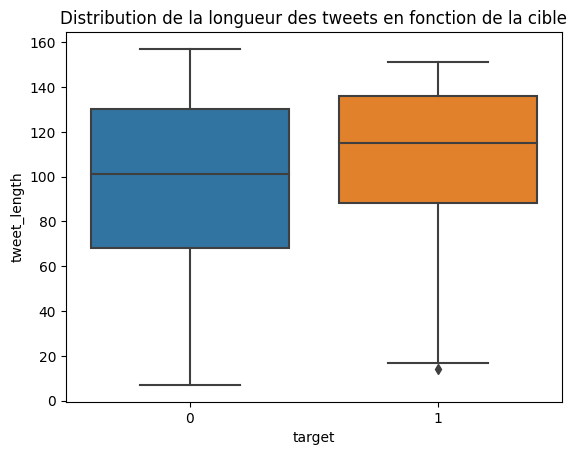

In [8]:
df['tweet_length'] = df['text'].apply(len)

sns.boxplot(x='target', y='tweet_length', data=df)
plt.title('Distribution de la longueur des tweets en fonction de la cible')
plt.show()

Quel est le ratio tweet qui parlent de “catastrophes” / tweet
normaux ?

In [9]:
catastrophe_tweets = df[df['target'] == 1]
normal_tweets = df[df['target'] == 0]
ratio_catastrophe_normal = len(catastrophe_tweets) / len(normal_tweets)
print(f"\nRatio de tweets qui parlent de 'catastrophes' par rapport aux tweets normaux : {ratio_catastrophe_normal}")


Ratio de tweets qui parlent de 'catastrophes' par rapport aux tweets normaux : 0.7533394748963611


En regardant quelques tweets au hasard, peut-on deviner facilement la “target” ?

In [22]:
random_tweets = df.sample(5)
print("\nQuelques tweets au hasard :")
print(random_tweets[['keyword','text', 'target']])


Quelques tweets au hasard :
           keyword                                               text  target
1388  bush%20fires  So apparently there were bush fires near where...       1
3349     evacuated  @115Film Doctor we must leave immediately the ...       1
3497     explosion  #Tampa: Super Freestyle Explosion Live in Conc...       0
4352        hijack  Bayelsa poll: Tension in Bayelsa as Patience J...       0
4359      hijacker  Remove the http://t.co/Xxj2B4JxRt and Linkury ...       0


La valeur 1 de la colonne "target" indique que le tweet parle d'une catastrophe réelle, tandis que la valeur 0 indique que le tweet ne parle pas d'une catastrophe réelle. C'est un problème de contexte d'utilisation d'un mot. 

Par exemple, la phrase "Je meurs de faim" peut être utilisée dans un contexte de catastrophe réelle ou juste pour exprimer la faim. Dans ce cas, il est difficile de deviner facilement la "target" en regardant quelques tweets au hasard.

Peut-on déjà détecter des “patterns” ou des mots clés dans les
tweets?

In [25]:
catastrophe_keywords = ['#earthquake', '#wildfires', '#flood', '#disaster','']
for keyword in catastrophe_keywords:
    df[keyword] = df['text'].apply(lambda x: 1 if keyword in x.lower() else 0)

keyword_freq = df[catastrophe_keywords].sum()
print("\nFréquence des mots clés dans les tweets :")
print(keyword_freq)


Fréquence des mots clés dans les tweets :
#earthquake      20
#wildfires        5
#flood           10
#disaster         8
               7613
dtype: int64
